In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('log2.csv') 
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [4]:
df.isna().sum()


Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f'{column}: Number of Unique Values = {unique_count}')

Source Port: Number of Unique Values = 22724
Destination Port: Number of Unique Values = 3273
NAT Source Port: Number of Unique Values = 29152
NAT Destination Port: Number of Unique Values = 2533
Action: Number of Unique Values = 4
Bytes: Number of Unique Values = 10724
Bytes Sent: Number of Unique Values = 6683
Bytes Received: Number of Unique Values = 8814
Packets: Number of Unique Values = 1116
Elapsed Time (sec): Number of Unique Values = 915
pkts_sent: Number of Unique Values = 749
pkts_received: Number of Unique Values = 922


In [6]:
unique_values = df['Action'].unique()
# print(unique_values)

value_counts = df['Action'].value_counts()
print(value_counts)

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64


In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

le = LabelEncoder()
df['Action'] = le.fit_transform(df['Action'])
df

mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print('Mapping:\n', mapping)


Mapping:
 {'allow': 0, 'deny': 1, 'drop': 2, 'reset-both': 3}


In [8]:
X = df.drop(columns=['Action']) 
y = df['Action'] 

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)


In [9]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [10]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('SVM Accuracy:', svm_accuracy)

SVM Accuracy: 0.5756466010528725


In [11]:
print('SVM Classification Report:')
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      7545
           1       0.00      0.00      0.00      2994
           2       0.00      0.00      0.00      2562
           3       0.00      0.00      0.00         6

    accuracy                           0.58     13107
   macro avg       0.14      0.25      0.18     13107
weighted avg       0.33      0.58      0.42     13107



C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_conf_matrix

array([[7545,    0,    0,    0],
       [2994,    0,    0,    0],
       [2562,    0,    0,    0],
       [   6,    0,    0,    0]], dtype=int64)

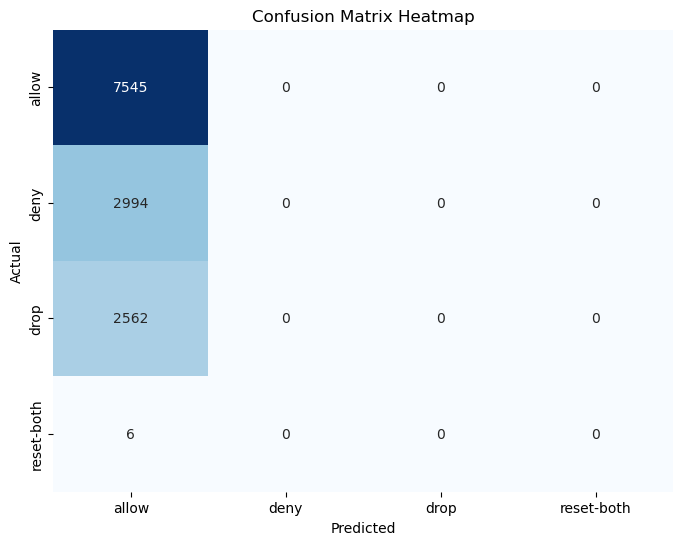

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, 
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['allow', 'deny', 'drop', 'reset-both'], 
            yticklabels = ['allow', 'deny', 'drop', 'reset-both'],
            cbar = False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [14]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)

In [15]:
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print('SGD Accuracy:', sgd_accuracy)

SGD Accuracy: 0.9589532310978867


In [16]:
print('SGD Classification Report:')
print(classification_report(y_test, sgd_predictions))

SGD Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7545
           1       0.99      0.86      0.92      2994
           2       0.92      1.00      0.96      2562
           3       0.00      0.00      0.00         6

    accuracy                           0.96     13107
   macro avg       0.73      0.71      0.72     13107
weighted avg       0.98      0.96      0.97     13107



In [17]:
sgd_conf_matrix = confusion_matrix(y_test, sgd_predictions)
sgd_conf_matrix

array([[7437,   19,   57,   32],
       [  25, 2570,  178,  221],
       [   0,    0, 2562,    0],
       [   3,    3,    0,    0]], dtype=int64)

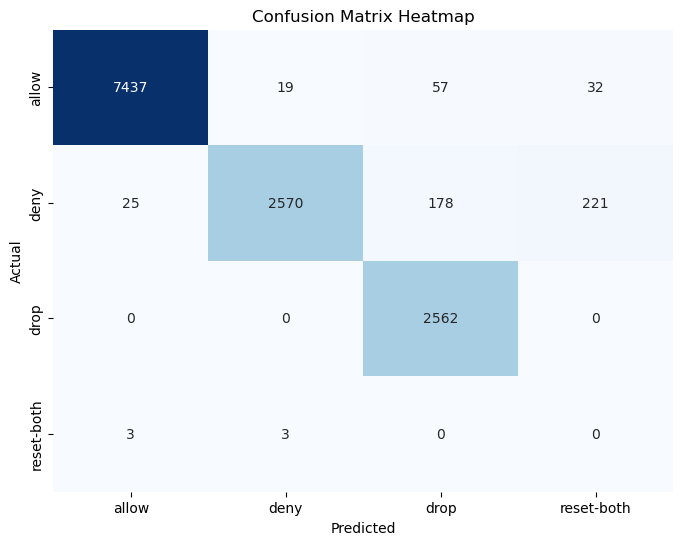

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(sgd_conf_matrix, 
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['allow', 'deny', 'drop', 'reset-both'], 
            yticklabels = ['allow', 'deny', 'drop', 'reset-both'],
            cbar = False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


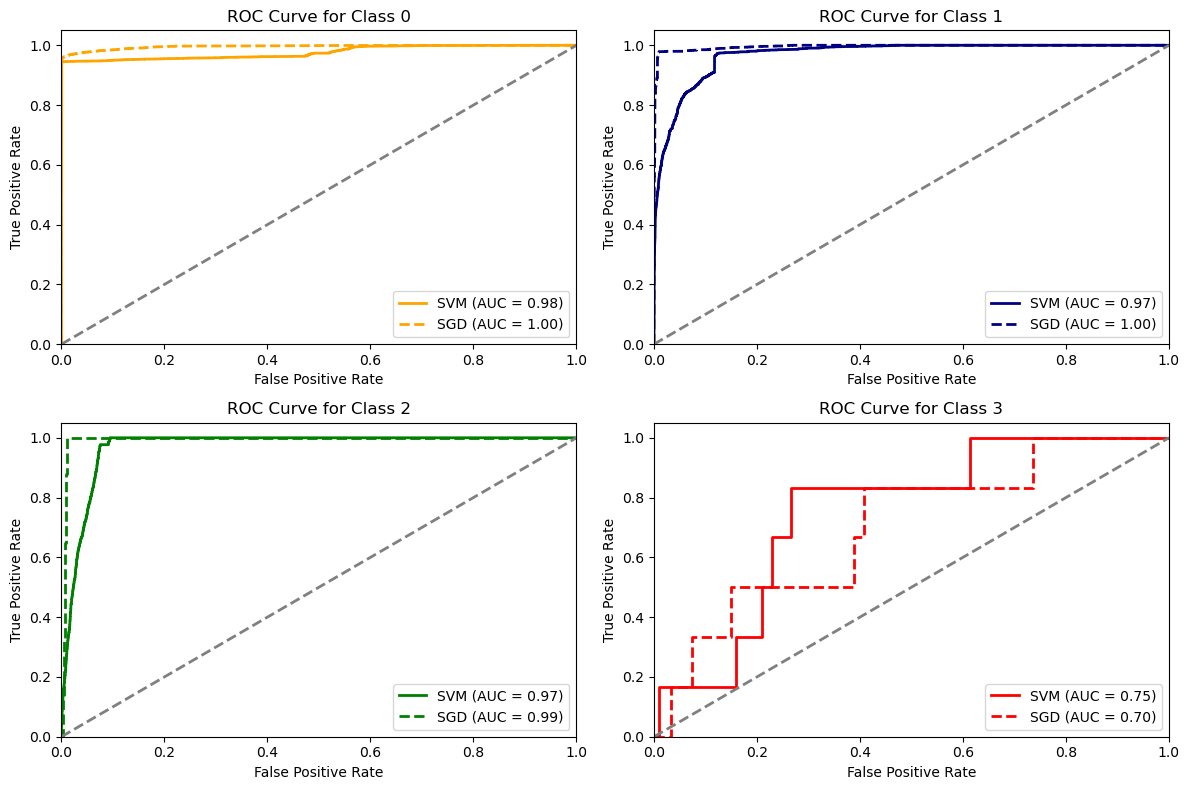

In [19]:
#### is auc a good way to view this??
#### i think so if split up like htis
# https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

y_test_binarized = label_binarize(y_test, classes = [0, 1, 2, 3])

svm_probs = svm_model.decision_function(X_test)
sgd_probs = sgd_model.decision_function(X_test)

n_classes = 4
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()

fpr_sgd = dict()
tpr_sgd = dict()
roc_auc_sgd = dict()

plt.figure(figsize=(12, 8))

colors = ['orange', 'navy', 'green', 'red']

for i in range(n_classes):
    plt.subplot(2, 2, i + 1)  
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binarized[:, i], svm_probs[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])
    
    fpr_sgd[i], tpr_sgd[i], _ = roc_curve(y_test_binarized[:, i], sgd_probs[:, i])
    roc_auc_sgd[i] = auc(fpr_sgd[i], tpr_sgd[i])
    
    plt.plot(fpr_svm[i], 
             tpr_svm[i],
             color = colors[i],
             lw = 2,
             label = f'SVM (AUC = {roc_auc_svm[i]:.2f})')
    
    plt.plot(fpr_sgd[i],
             tpr_sgd[i],
             color = colors[i],
             linestyle = '--', 
             lw = 2,
             label = f'SGD (AUC = {roc_auc_sgd[i]:.2f})')
    
    plt.plot([0, 1], 
             [0, 1],
             color = 'gray', 
             lw = 2,
             linestyle = '--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {i}')
    plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()


In [ ]:
######### SCALING DATA ############

In [21]:
##### TESTING #####

df = pd.read_csv('log2.csv') 
df

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

le = LabelEncoder()
df['Action'] = le.fit_transform(df['Action'])
df

mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print('Mapping:\n', mapping)


Mapping:
 {'allow': 0, 'deny': 1, 'drop': 2, 'reset-both': 3}


In [23]:

columns_to_exclude = ['Action'] 
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

scaler = StandardScaler()

df[columns_to_include] = scaler.fit_transform(df[columns_to_include])
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.513256,-0.569937,1.606882,-0.268819,0,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197
1,0.450066,-0.389279,1.682938,0.073718,0,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598
2,-2.786582,2.152272,1.091555,4.892650,0,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197
3,0.076105,-0.389279,1.423272,0.073718,0,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498
4,0.039987,-0.548817,1.209121,-0.228774,0,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,0.937297,-0.568475,-0.275186,-0.266046,0,-0.017231,-0.005798,-0.030293,-0.018871,-0.168067,-0.011619,-0.026747
65528,0.103046,-0.568475,-0.263898,-0.266046,0,0.815823,0.011736,1.842607,0.890740,0.036919,0.293149,1.632037
65529,0.359149,-0.548708,-0.877675,-0.274261,2,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646
65530,0.359083,-0.548708,-0.877675,-0.274261,2,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646


In [25]:
X = df.drop(columns=['Action']) 
y = df['Action'] 

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)


In [26]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [27]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('SVM Accuracy:', svm_accuracy)

SVM Accuracy: 0.9864194705119402


In [28]:
print('SVM Classification Report:')
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7545
           1       0.99      0.96      0.97      2994
           2       0.95      1.00      0.97      2562
           3       0.00      0.00      0.00         6

    accuracy                           0.99     13107
   macro avg       0.73      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107



C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_conf_matrix

array([[7481,   37,   27,    0],
       [   0, 2886,  108,    0],
       [   0,    0, 2562,    0],
       [   3,    3,    0,    0]], dtype=int64)

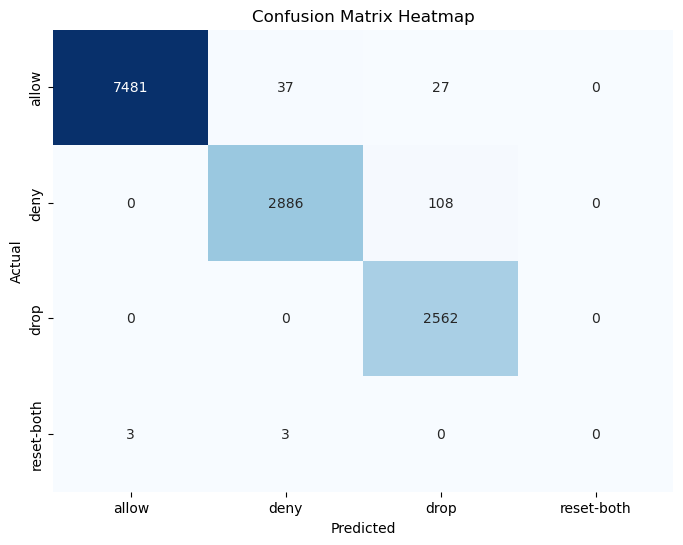

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, 
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['allow', 'deny', 'drop', 'reset-both'], 
            yticklabels = ['allow', 'deny', 'drop', 'reset-both'],
            cbar = False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [9]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)

MemoryError: Unable to allocate 22.5 GiB for an array with shape (52425, 57689) and data type float64

In [32]:
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print('SGD Accuracy:', sgd_accuracy)

SGD Accuracy: 0.9832150759136339


In [33]:
print('SGD Classification Report:')
print(classification_report(y_test, sgd_predictions))

SGD Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7545
           1       0.99      0.95      0.97      2994
           2       0.93      1.00      0.97      2562
           3       0.00      0.00      0.00         6

    accuracy                           0.98     13107
   macro avg       0.73      0.74      0.73     13107
weighted avg       0.98      0.98      0.98     13107



C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
sgd_conf_matrix = confusion_matrix(y_test, sgd_predictions)
sgd_conf_matrix

array([[7478,   34,   33,    0],
       [   0, 2847,  147,    0],
       [   0,    0, 2562,    0],
       [   3,    3,    0,    0]], dtype=int64)

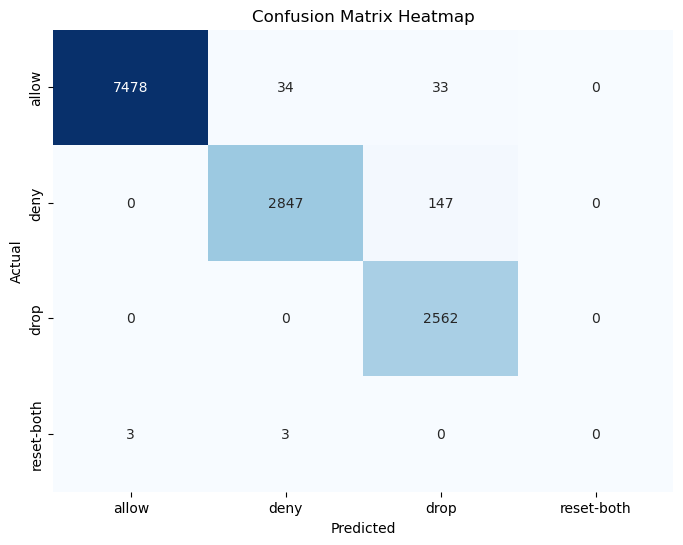

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(sgd_conf_matrix, 
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = ['allow', 'deny', 'drop', 'reset-both'], 
            yticklabels = ['allow', 'deny', 'drop', 'reset-both'],
            cbar = False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


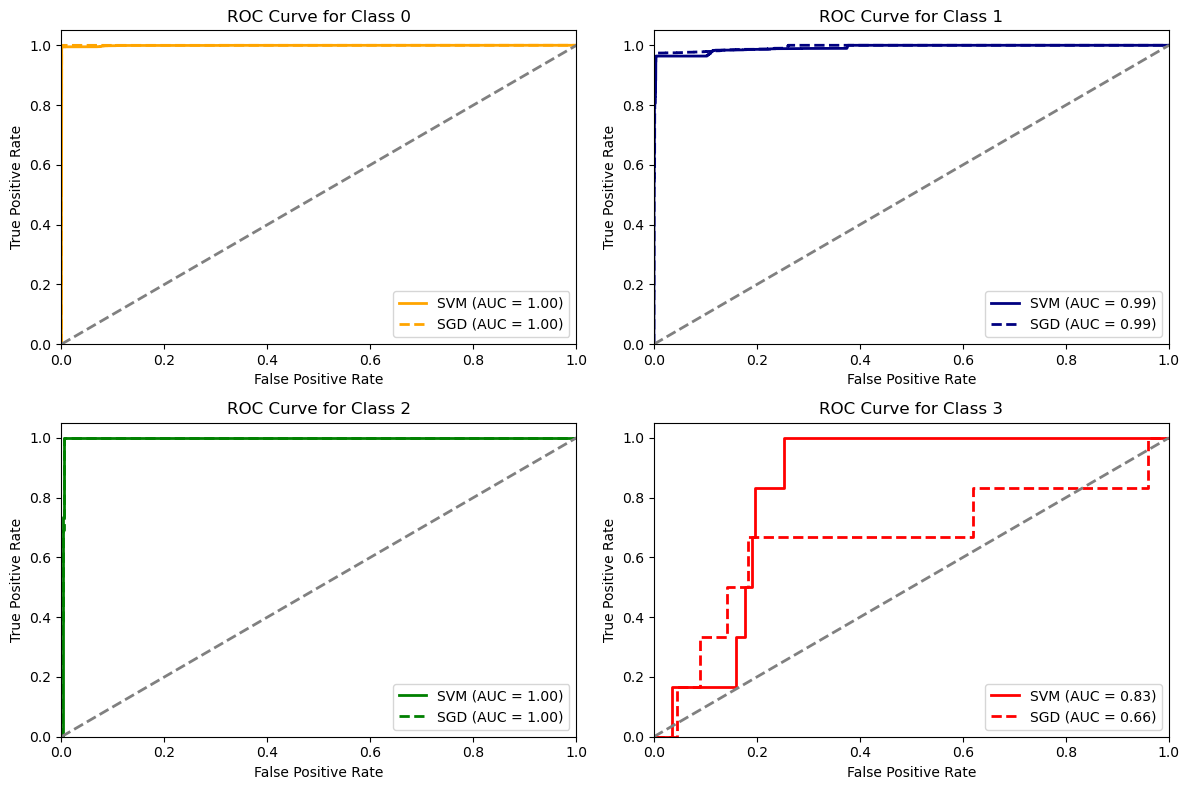

In [36]:
#### is auc a good way to view this??
#### i think so if split up like htis

y_test_binarized = label_binarize(y_test, classes = [0, 1, 2, 3])

svm_probs = svm_model.decision_function(X_test)
sgd_probs = sgd_model.decision_function(X_test)

n_classes = 4
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()

fpr_sgd = dict()
tpr_sgd = dict()
roc_auc_sgd = dict()

plt.figure(figsize=(12, 8))

colors = ['orange', 'navy', 'green', 'red']

for i in range(n_classes):
    plt.subplot(2, 2, i + 1)  
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binarized[:, i], svm_probs[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])
    
    fpr_sgd[i], tpr_sgd[i], _ = roc_curve(y_test_binarized[:, i], sgd_probs[:, i])
    roc_auc_sgd[i] = auc(fpr_sgd[i], tpr_sgd[i])
    
    plt.plot(fpr_svm[i], 
             tpr_svm[i],
             color = colors[i],
             lw = 2,
             label = f'SVM (AUC = {roc_auc_svm[i]:.2f})')
    
    plt.plot(fpr_sgd[i],
             tpr_sgd[i],
             color = colors[i],
             linestyle = '--', 
             lw = 2,
             label = f'SGD (AUC = {roc_auc_sgd[i]:.2f})')
    
    plt.plot([0, 1], 
             [0, 1],
             color = 'gray', 
             lw = 2,
             linestyle = '--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {i}')
    plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()


In [ ]:
#### TESTING THE ONE HOT ENCODING ####

In [2]:
df = pd.read_csv('log2.csv') 
df

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

le = LabelEncoder()
df['Action'] = le.fit_transform(df['Action'])
df

mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print('Mapping:\n', mapping)


Mapping:
 {'allow': 0, 'deny': 1, 'drop': 2, 'reset-both': 3}


In [3]:
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,0,177,94,83,2,30,1,1
1,56258,3389,56258,3389,0,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,0,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,0,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,0,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,0,314,192,122,6,15,4,2
65528,50964,80,13485,80,0,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,2,70,70,0,1,0,1,0
65530,54870,445,0,0,2,70,70,0,1,0,1,0


In [4]:
columns_to_encode = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

df_encoded

,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_0,Source Port_5,...,NAT Destination Port_64932,NAT Destination Port_65054,NAT Destination Port_65100,NAT Destination Port_65128,NAT Destination Port_65253,NAT Destination Port_65264,NAT Destination Port_65387,NAT Destination Port_65427,NAT Destination Port_65534,NAT Destination Port_65535
0,0,177,94,83,2,30,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,4768,1600,3168,19,17,10,9,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,238,118,120,2,1199,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,3327,1438,1889,15,17,8,7,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,25358,6778,18580,31,16,13,18,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,0,314,192,122,6,15,4,2,False,False,...,False,False,False,False,False,False,False,False,False,False
65528,0,4680740,67312,4613428,4675,77,985,3690,False,False,...,False,False,False,False,False,False,False,False,False,False
65529,2,70,70,0,1,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
65530,2,70,70,0,1,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df_encoded_numerical = df_encoded.apply(lambda col: col.astype(int))
df_encoded_numerical

,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_0,Source Port_5,...,NAT Destination Port_64932,NAT Destination Port_65054,NAT Destination Port_65100,NAT Destination Port_65128,NAT Destination Port_65253,NAT Destination Port_65264,NAT Destination Port_65387,NAT Destination Port_65427,NAT Destination Port_65534,NAT Destination Port_65535
0,0,177,94,83,2,30,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4768,1600,3168,19,17,10,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,238,118,120,2,1199,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3327,1438,1889,15,17,8,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,25358,6778,18580,31,16,13,18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,0,314,192,122,6,15,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
65528,0,4680740,67312,4613428,4675,77,985,3690,0,0,...,0,0,0,0,0,0,0,0,0,0
65529,2,70,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65530,2,70,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
### Trying to do a feature selection to make df smaller

from sklearn.feature_selection import SelectKBest, f_classif

k = 10000
selector = SelectKBest(score_func=f_classif, k=k)
selected_features = selector.fit_transform(df_encoded_numerical, df_encoded_numerical['Action']) 

MemoryError: Unable to allocate 8.09 GiB for an array with shape (37640, 57690) and data type float32

In [5]:
X = df_encoded_numerical.drop(columns=['Action']) 
y = df_encoded_numerical['Action'] 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)


In [10]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

MemoryError: Unable to allocate 22.5 GiB for an array with shape (52425, 57689) and data type float64

In [17]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('SVM Accuracy:', svm_accuracy)

SVM Accuracy: 0.5756466010528725


In [18]:
print('SVM Classification Report:')
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      7545
           1       0.00      0.00      0.00      2994
           2       0.00      0.00      0.00      2562
           3       0.00      0.00      0.00         6

    accuracy                           0.58     13107
   macro avg       0.14      0.25      0.18     13107
weighted avg       0.33      0.58      0.42     13107



C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\austi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
